In [5]:
#Task 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
#importing datasets
df_train = pd.read_csv('./Quantum internship/internship_train.csv')
df_test = pd.read_csv('./Quantum internship/internship_hidden_test.csv')

In [3]:
#Exploring data
"""
There are 53 features in the data, but some of them seem to have very similar information, 
with some metrics being exactly the same. This suggests that the data may not be naturally occurring,
but instead may have been artificially generated. 
The presence of artificially generated features with similar information and identical metrics could
potentially have a negative impact on the accuracy of the model, as these features may not have a 
linear relationship with the target variable.
"""
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [4]:
#No missing data. Only float or integer values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [5]:
# Creating Feature and target datasets

In [6]:
X = df_train.drop('target',axis=1)
y = df_train['target']

In [7]:
#Spliting datasets into traine and test subsets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#Importing Linear regression model. Fitting and predicting

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
#Measure accuracy

In [16]:
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
RMSE

28.939865868423546

In [17]:
mean = predictions.mean()

In [18]:
#Very bad output. Regression model seems to be helpless
RMSE/mean

0.5772759846807012

<AxesSubplot:xlabel='target', ylabel='Count'>

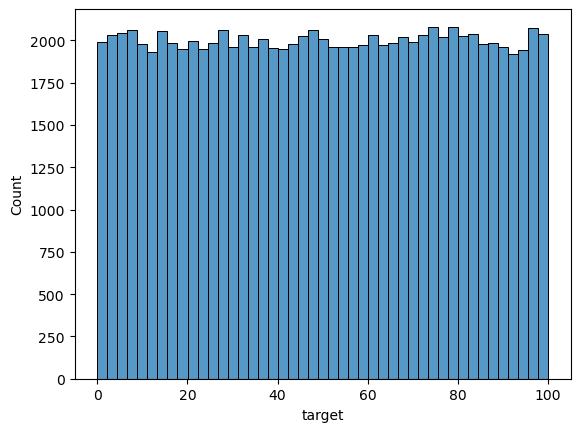

In [19]:
#How target is distributed? It seems like it is not a normal distribution
sns.histplot(data=df_train, x='target')

In [20]:
residuals = y_test-predictions

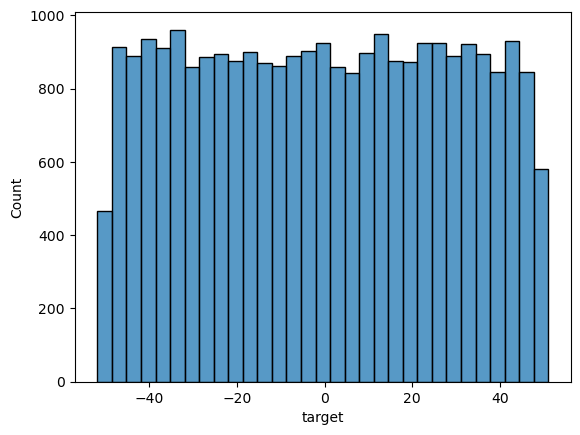

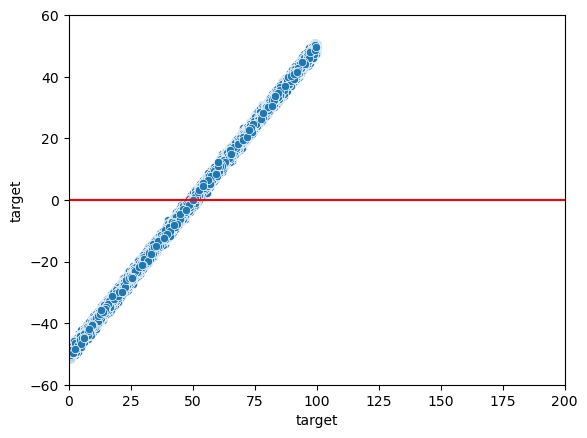

In [21]:
"""
How residuals are distributed? 
It is not a normal distribution! The variance of the residuals is constant across
he range of the target variable.
If the target variable in a regression problem is evenly distributed over the range and does not follow
a normal distribution, then linear regression models might not be the best choice, as they assume 
a linear relationship between the target variable and the predictor variables, and they also assume that the 
residuals are normally distributed.
"""

sns.histplot(data=residuals)

plt.figure()
ax = sns.scatterplot(x=y_test, y=residuals)
ax.set_xlim([0, 200]) # set x-axis limits
ax.set_ylim([-60, 60]) # set y-axis limits
plt.axhline(y=0, color='r')
plt.show()

In [23]:
"""
Lets consider using other regression model that is more flexible and can capture nonlinear relationships 
between the variables. For instance, Recurrent Neural Networks (RNN)
"""

'\nLets consider using other regression model that is more flexible and can capture nonlinear relationships \nbetween the variables. For instance, Recurrent Neural Networks (RNN)\n'

In [24]:
#Import TensorFlow
import tensorflow as tf

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv("C:\\Users\\Oleksii\\py\\Quantum\\Quantum internship\\internship_train.csv")

X = df.drop('target',axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

model.fit(X_train, y_train, epochs=50)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))



Epoch 1/50
1969/1969 [==============================] - 9s 4ms/step - loss: 25.8510 - mae: 25.8510
Epoch 2/50
1969/1969 [==============================] - 7s 3ms/step - loss: 25.4432 - mae: 25.4432
Epoch 3/50
1969/1969 [==============================] - 7s 3ms/step - loss: 25.3403 - mae: 25.3403
Epoch 4/50
1969/1969 [==============================] - 7s 3ms/step - loss: 25.2769 - mae: 25.2769
Epoch 5/50
1969/1969 [==============================] - 7s 3ms/step - loss: 25.1187 - mae: 25.1187
Epoch 6/50
1969/1969 [==============================] - 7s 4ms/step - loss: 9.6435 - mae: 9.6435
Epoch 7/50
1969/1969 [==============================] - 7s 4ms/step - loss: 3.6001 - mae: 3.6001
Epoch 8/50
1969/1969 [==============================] - 7s 4ms/step - loss: 3.4043 - mae: 3.4043
Epoch 9/50
1969/1969 [==============================] - 7s 4ms/step - loss: 3.1243 - mae: 3.1243
Epoch 10/50
1969/1969 [==============================] - 7s 4ms/step - loss: 3.0952 - mae: 3.0952
Epoch 11/50
1969/19

In [28]:
print(f'RMSE:{rmse}')

RMSE:0.9425082944834386


In [ ]:
#Much better result!

In [39]:
#predicting values and save into csv
predictions = model.predict(X)
predictions = pd.DataFrame(predictions, columns=['target'])
predictions.to_csv('predictions.csv', index=False)

2813/2813 [==============================] - 7s 2ms/step
